In [2]:
import agent
import numpy as np
from game import Game
from collections import deque
from agent import Agent
import time
import torch
import datetime
import random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import pickle
import math
import os
print("Numpy version:", np.__version__)
print("PyTorch version:", torch.__version__)



Numpy version: 1.23.5
PyTorch version: 2.0.1


In [3]:
# update imports from othere py files automatically
%load_ext autoreload
%autoreload 2

# Deep Q-Learning function

In [4]:
def expectimax():
    """Expectimax agent"""
    # main loop
    time_start = time.time()
    
    # keep track of different actions taken per episode
    actions = np.array([0, 0, 0, 0])
    
    # Starting with a fresh board
    env.reset(2)                        # reset environment
    
    state = env.current_state()         # get the current state      
    score = env.score                                 # initialize the score
    agent.total_steps = 0
    
    # keep playing
    while not env.done:        
        action_values = agent.act(state)    # select an action
        # Clear the output in Jupyter Notebook
        clear_output(wait=True)

        # Print the string representation
        env.draw_board(env.game_board)
        
        actions_sorted = [(i, v) for i, v in enumerate(action_values[0])]
        actions_sorted = sorted(actions_sorted, key=lambda x: x[1], reverse=True)
        action_idx = 0
        env.moved = False
        while not env.moved:
            
            action_elem = actions_sorted[action_idx]
            action_idx += 1

            action = np.int64(action_elem[0])
            actions[action] += 1
            env.step(action, action_values)                              # send the action to environment
            next_state = env.current_state()  # get the current state 

            # save the results of the step

            done = env.done                             # check if episode has finished
            state = next_state
            agent.total_steps += 1

            if done:
                break 
        
        time_end = time.time()


        

In [40]:
penalty = 0
state = [0,0,2,8,8,64,2, 4]
max_val = np.max(state)
sorted_values = np.unique(np.sort(state))
# on which index is the max value
max_index = np.where(sorted_values == max_val)[0][0]

                

In [41]:
max_index, sorted_values

(4, array([ 0,  2,  4,  8, 64]))

In [42]:
max_index * 0.5

2.0

# Initialization & training

In [5]:
edge_max_bonus=1.5
open_square_bonus=0.2

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, edge_max_bonus=edge_max_bonus, open_square_bonus=open_square_bonus)

In [43]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

KeyboardInterrupt: 

In [47]:
edge_max_bonus=1.5
open_square_bonus=0.5
corner_max_penalty_value=0.5
non_monotonic_penalty_value=0.2

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

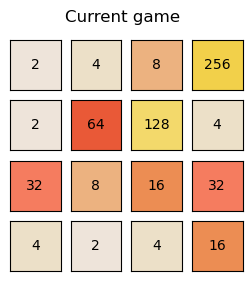

In [48]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min


In [49]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.3
non_monotonic_penalty_value=0.2

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

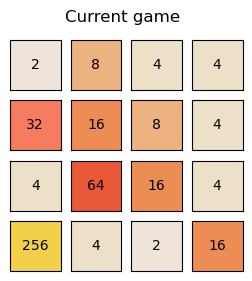

In [50]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [6]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.5
non_monotonic_penalty_value=0.5

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

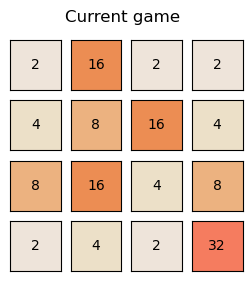

In [7]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [53]:
edge_max_bonus=1.5
open_square_bonus=0.5
corner_max_penalty_value=0.3
non_monotonic_penalty_value=0.3

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

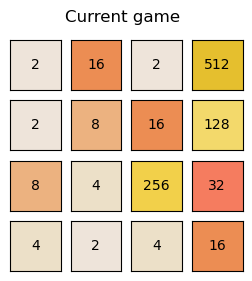

In [54]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [55]:
edge_max_bonus=2
open_square_bonus=0.2
corner_max_penalty_value=0.5
non_monotonic_penalty_value=0.3

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

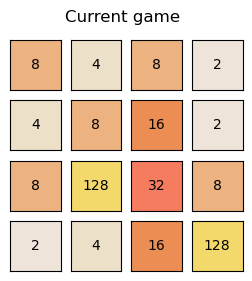

In [56]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [57]:
edge_max_bonus=2
open_square_bonus=0.2
corner_max_penalty_value=0.5
non_monotonic_penalty_value=0.5

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

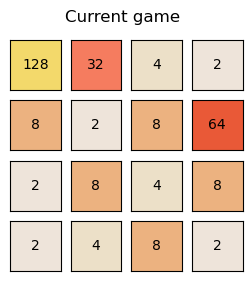

In [58]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [59]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.7
non_monotonic_penalty_value=0.5

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

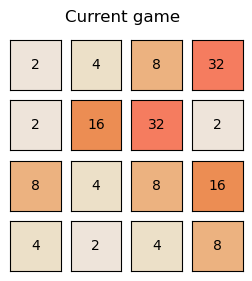

In [60]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [61]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.7
non_monotonic_penalty_value=0.3

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

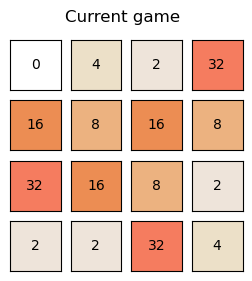

In [62]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [83]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.7
non_monotonic_penalty_value=0.3

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

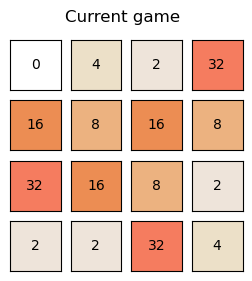

In [84]:
# Run the training
expectimax()
# mogoce vecja ocena za gradient? non_monotonic_penalty vecji
# pa da se ne ful premika najvecji square
# da je njvecji square v KOTU ne samo edge: problem če je v kotu majhna številka v primerjavi z največjo na board
# 

In [63]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.1
non_monotonic_penalty_value=0.15

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

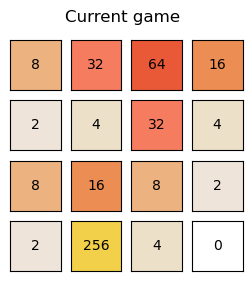

In [64]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min


In [65]:
edge_max_bonus=1
open_square_bonus=0.2
corner_max_penalty_value=0.1
non_monotonic_penalty_value=0.15

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

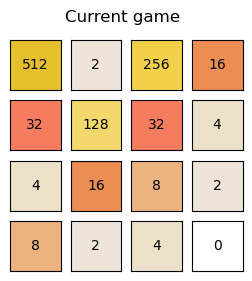

In [66]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min


In [67]:
edge_max_bonus=0.8
open_square_bonus=0.2
corner_max_penalty_value=0.1
non_monotonic_penalty_value=0.1

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

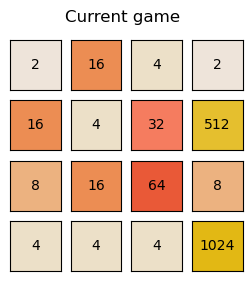

In [68]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min


In [69]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.1
non_monotonic_penalty_value=0.15

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

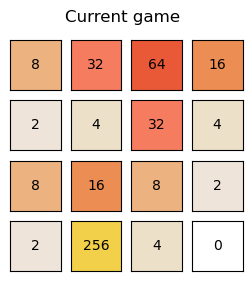

In [70]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min


In [71]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.1
non_monotonic_penalty_value=0.2

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

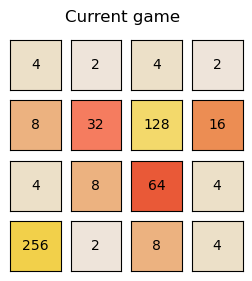

In [72]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min


In [73]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.0
non_monotonic_penalty_value=0.2

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

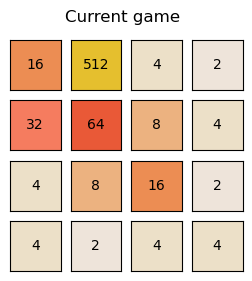

In [74]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min

In [75]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.1
non_monotonic_penalty_value=0.1

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

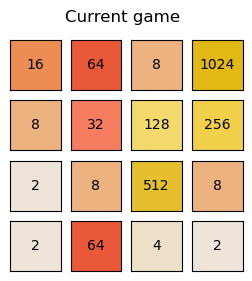

In [76]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min

In [77]:
edge_max_bonus=1.7
open_square_bonus=0.2
corner_max_penalty_value=0.0
non_monotonic_penalty_value=0.1

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

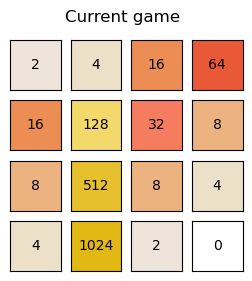

In [78]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min

In [8]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.05
non_monotonic_penalty_value=0.05

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

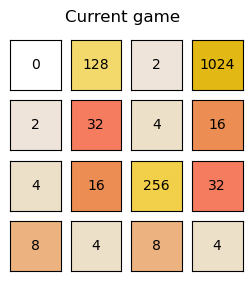

In [9]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min

In [ ]:
edge_max_bonus=1.5
open_square_bonus=0.2
corner_max_penalty_value=0.0
non_monotonic_penalty_value=0.1

# # Create the environment with 4x4 board
env = Game()
# Create the agent, duplicating default values for visibility
agent = Agent(state_size=4*4, action_size=env.action_size, seed=65, 
              edge_max_bonus=edge_max_bonus, 
              open_square_bonus=open_square_bonus, 
              corner_max_penalty_value=corner_max_penalty_value, 
              non_monotonic_penalty_value=non_monotonic_penalty_value)

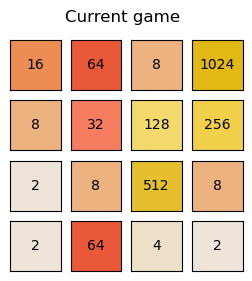

In [ ]:
# Run the training
expectimax()
# good start: the corners and the gradient - 256 good, after 15 min